# Iris Tensorflow experiment

Experimenting the famous iris dataset using Tensorflow neural networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
X = data.data
y = data.target

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Data Preprocessing

Using One-Hot-Encoder (for categorical_crossentropy loss)<br>
and sklearn test train split

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(y.reshape(-1, 1))

In [7]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

## Tensorflow Dense layers (Deep Neural Network layers)

input layers = 10<br>
hidden layers = 100<br>
output layers = 3 (label: 3)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=30, epochs=120)

Epoch 1/120
3/3 [==============================] - 1s 103ms/step - loss: 1.1095 - accuracy: 0.2603 - val_loss: 1.0434 - val_accuracy: 0.4688
Epoch 2/120
3/3 [==============================] - 0s 21ms/step - loss: 1.0445 - accuracy: 0.3836 - val_loss: 1.0240 - val_accuracy: 0.2812
Epoch 3/120
3/3 [==============================] - 0s 23ms/step - loss: 0.9875 - accuracy: 0.3836 - val_loss: 1.0075 - val_accuracy: 0.3750
Epoch 4/120
3/3 [==============================] - 0s 22ms/step - loss: 0.9450 - accuracy: 0.5753 - val_loss: 0.9906 - val_accuracy: 0.5938
Epoch 5/120
3/3 [==============================] - 0s 24ms/step - loss: 0.9055 - accuracy: 0.7397 - val_loss: 0.9681 - val_accuracy: 0.5938
Epoch 6/120
3/3 [==============================] - 0s 20ms/step - loss: 0.8713 - accuracy: 0.7397 - val_loss: 0.9434 - val_accuracy: 0.5938
Epoch 7/120
3/3 [==============================] - 0s 20ms/step - loss: 0.8373 - accuracy: 0.7397 - val_loss: 0.9179 - val_accuracy: 0.5938
Epoch 8/120
3/3 [==

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 100)               1100      
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,453
Trainable params: 1,453
Non-trainable params: 0
_________________________________________________________________


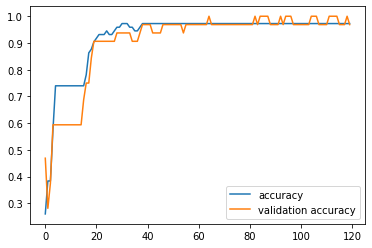

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

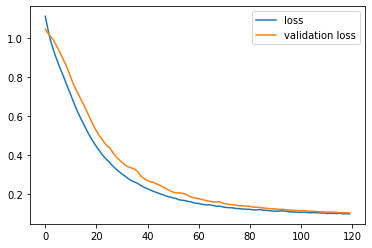

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])

In [15]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.10467059165239334
Test accuracy: 0.9777777791023254


In [16]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [17]:
from sklearn.metrics import accuracy_score
pred_accuracy = accuracy_score(y_pred, y_test)
pred_accuracy

0.9777777777777777

In [18]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print("Actual: {}".format(actual))
print("Predicted: {}".format(predicted))

Actual: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 2 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [19]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45
    samples avg       0.98      0.98      0.98        45



## Using Tensorflow Convolutional Neural Networks (CNN)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 2, activation='relu', input_shape=(4,1)),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=30, epochs=120)

Epoch 1/120
3/3 [==============================] - 2s 137ms/step - loss: 1.5987 - accuracy: 0.2603 - val_loss: 1.2255 - val_accuracy: 0.4062
Epoch 2/120
3/3 [==============================] - 0s 24ms/step - loss: 1.4417 - accuracy: 0.3425 - val_loss: 1.1465 - val_accuracy: 0.7188
Epoch 3/120
3/3 [==============================] - 0s 27ms/step - loss: 1.3054 - accuracy: 0.6027 - val_loss: 1.0842 - val_accuracy: 0.7188
Epoch 4/120
3/3 [==============================] - 0s 22ms/step - loss: 1.1989 - accuracy: 0.6164 - val_loss: 1.0388 - val_accuracy: 0.7188
Epoch 5/120
3/3 [==============================] - 0s 22ms/step - loss: 1.1053 - accuracy: 0.6164 - val_loss: 1.0113 - val_accuracy: 0.7188
Epoch 6/120
3/3 [==============================] - 0s 23ms/step - loss: 1.0452 - accuracy: 0.6164 - val_loss: 0.9970 - val_accuracy: 0.7188
Epoch 7/120
3/3 [==============================] - 0s 22ms/step - loss: 1.0021 - accuracy: 0.6712 - val_loss: 0.9957 - val_accuracy: 0.6250
Epoch 8/120
3/3 [==

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1,283
Trainable params: 1,283
Non-trainable params: 0
____________________________________________________

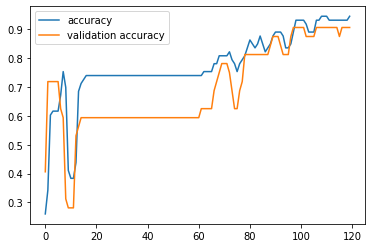

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

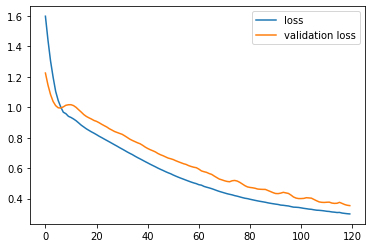

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.36096835136413574
Test accuracy: 0.8666666746139526


In [27]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [28]:
from sklearn.metrics import accuracy_score
pred_accuracy = accuracy_score(y_pred, y_test)
pred_accuracy

0.8666666666666667

In [29]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print("Actual: {}".format(actual))
print("Predicted: {}".format(predicted))

Actual: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 2 0 0 2 2 2 0 2 1 0 0 2 2 1 2 1 2 2 0 2
 0 1 2 2 0 2 2 1]


In [30]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.67      0.80        18
 Iris-virginica       0.68      1.00      0.81        13

      micro avg       0.87      0.87      0.87        45
      macro avg       0.89      0.89      0.87        45
   weighted avg       0.91      0.87      0.87        45
    samples avg       0.87      0.87      0.87        45



## Using Tensorflow Recurrent Neural Networks (Vanilla RNN)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(4,1)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=30, epochs=120)

Epoch 1/120
3/3 [==============================] - 1s 124ms/step - loss: 1.0984 - accuracy: 0.4110 - val_loss: 1.0731 - val_accuracy: 0.5938
Epoch 2/120
3/3 [==============================] - 0s 28ms/step - loss: 1.0129 - accuracy: 0.7397 - val_loss: 1.0512 - val_accuracy: 0.5938
Epoch 3/120
3/3 [==============================] - 0s 27ms/step - loss: 0.9557 - accuracy: 0.7397 - val_loss: 1.0076 - val_accuracy: 0.5938
Epoch 4/120
3/3 [==============================] - 0s 29ms/step - loss: 0.8992 - accuracy: 0.7397 - val_loss: 0.9730 - val_accuracy: 0.5938
Epoch 5/120
3/3 [==============================] - 0s 27ms/step - loss: 0.8523 - accuracy: 0.7397 - val_loss: 0.9387 - val_accuracy: 0.5938
Epoch 6/120
3/3 [==============================] - 0s 27ms/step - loss: 0.8135 - accuracy: 0.7397 - val_loss: 0.8879 - val_accuracy: 0.5938
Epoch 7/120
3/3 [==============================] - 0s 27ms/step - loss: 0.7695 - accuracy: 0.7397 - val_loss: 0.8482 - val_accuracy: 0.5938
Epoch 8/120
3/3 [==

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 3)                 51        
                                                                 
Total params: 5,315
Trainable params: 5,315
Non-trainable params: 0
_________________________________________________________________


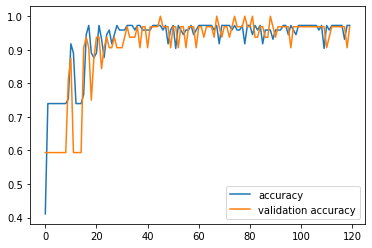

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

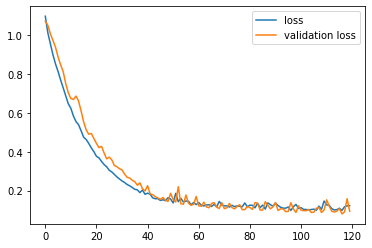

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])

In [37]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.08966762572526932
Test accuracy: 1.0


In [38]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
y_pred

2/2 [==============================] - 0s 5ms/step


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [39]:
from sklearn.metrics import accuracy_score
pred_accuracy = accuracy_score(y_pred, y_test)
pred_accuracy

1.0

In [40]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print("Actual: {}".format(actual))
print("Predicted: {}".format(predicted))

Actual: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [41]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45
    samples avg       1.00      1.00      1.00        45



## Using Tensorflow Long Short-term Memory (LSTM RNN)

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(4,1)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=30, epochs=120)

Epoch 1/120
3/3 [==============================] - 1s 149ms/step - loss: 1.1233 - accuracy: 0.3562 - val_loss: 1.1228 - val_accuracy: 0.3125
Epoch 2/120
3/3 [==============================] - 0s 37ms/step - loss: 1.1100 - accuracy: 0.3562 - val_loss: 1.1172 - val_accuracy: 0.3125
Epoch 3/120
3/3 [==============================] - 0s 39ms/step - loss: 1.1004 - accuracy: 0.3562 - val_loss: 1.1148 - val_accuracy: 0.3125
Epoch 4/120
3/3 [==============================] - 0s 37ms/step - loss: 1.0905 - accuracy: 0.3562 - val_loss: 1.1129 - val_accuracy: 0.3750
Epoch 5/120
3/3 [==============================] - 0s 43ms/step - loss: 1.0843 - accuracy: 0.4795 - val_loss: 1.1113 - val_accuracy: 0.2812
Epoch 6/120
3/3 [==============================] - 0s 38ms/step - loss: 1.0764 - accuracy: 0.3836 - val_loss: 1.1108 - val_accuracy: 0.2812
Epoch 7/120
3/3 [==============================] - 0s 39ms/step - loss: 1.0737 - accuracy: 0.3836 - val_loss: 1.1111 - val_accuracy: 0.2812
Epoch 8/120
3/3 [==

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_7 (Dense)             (None, 16)                1040      
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 17,987
Trainable params: 17,987
Non-trainable params: 0
_________________________________________________________________


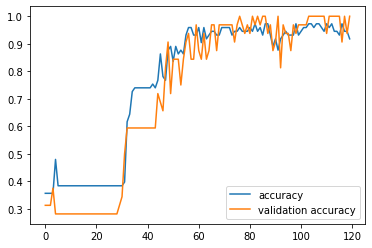

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

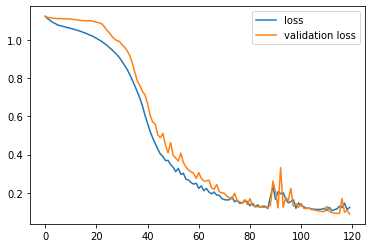

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])

In [48]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.1204773336648941
Test accuracy: 0.9555555582046509


In [49]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [50]:
from sklearn.metrics import accuracy_score
pred_accuracy = accuracy_score(y_pred, y_test)
pred_accuracy

0.9555555555555556

In [51]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print("Actual: {}".format(actual))
print("Predicted: {}".format(predicted))

Actual: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [52]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

      micro avg       0.96      0.96      0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45
    samples avg       0.96      0.96      0.96        45



## Using Tensorflow Gated Recurrent Unit (GRU RNN)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(64, activation='relu', input_shape=(4,1)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=30, epochs=120)

Epoch 1/120
3/3 [==============================] - 1s 169ms/step - loss: 1.0537 - accuracy: 0.3836 - val_loss: 1.0633 - val_accuracy: 0.2812
Epoch 2/120
3/3 [==============================] - 0s 52ms/step - loss: 1.0319 - accuracy: 0.3836 - val_loss: 1.0609 - val_accuracy: 0.2812
Epoch 3/120
3/3 [==============================] - 0s 49ms/step - loss: 1.0148 - accuracy: 0.3836 - val_loss: 1.0603 - val_accuracy: 0.2812
Epoch 4/120
3/3 [==============================] - 0s 50ms/step - loss: 1.0024 - accuracy: 0.3836 - val_loss: 1.0603 - val_accuracy: 0.2812
Epoch 5/120
3/3 [==============================] - 0s 56ms/step - loss: 0.9901 - accuracy: 0.3836 - val_loss: 1.0568 - val_accuracy: 0.2812
Epoch 6/120
3/3 [==============================] - 0s 66ms/step - loss: 0.9789 - accuracy: 0.3836 - val_loss: 1.0507 - val_accuracy: 0.2812
Epoch 7/120
3/3 [==============================] - 0s 54ms/step - loss: 0.9679 - accuracy: 0.3836 - val_loss: 1.0424 - val_accuracy: 0.2812
Epoch 8/120
3/3 [==

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_9 (Dense)             (None, 16)                1040      
                                                                 
 dense_10 (Dense)            (None, 3)                 51        
                                                                 
Total params: 13,955
Trainable params: 13,955
Non-trainable params: 0
_________________________________________________________________


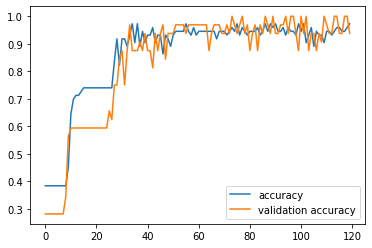

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

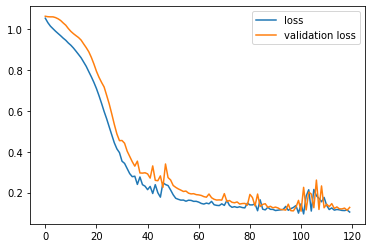

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])

In [59]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.11523469537496567
Test accuracy: 0.9777777791023254


In [61]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
y_pred

2/2 [==============================] - 0s 6ms/step


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [62]:
from sklearn.metrics import accuracy_score
pred_accuracy = accuracy_score(y_pred, y_test)
pred_accuracy

0.9777777777777777

In [63]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print("Actual: {}".format(actual))
print("Predicted: {}".format(predicted))

Actual: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [64]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45
    samples avg       0.98      0.98      0.98        45

